# Aula 02 - Séries Temporais

# Mais sobre autocorrelação

### Prof. Dr. Vitor Alex Oliveira Alves

# Exemplo 01
Vamos analisar uma série temporal que registra os volumes anuais de chuva em Los Angeles, Califórnia, por mais de 100 anos. Os dados estão contidos no arquivo larain.dat.


,Year,Inches
0,1878,20.86
1,1879,17.41
2,1880,18.65
3,1881,5.53
4,1882,10.74


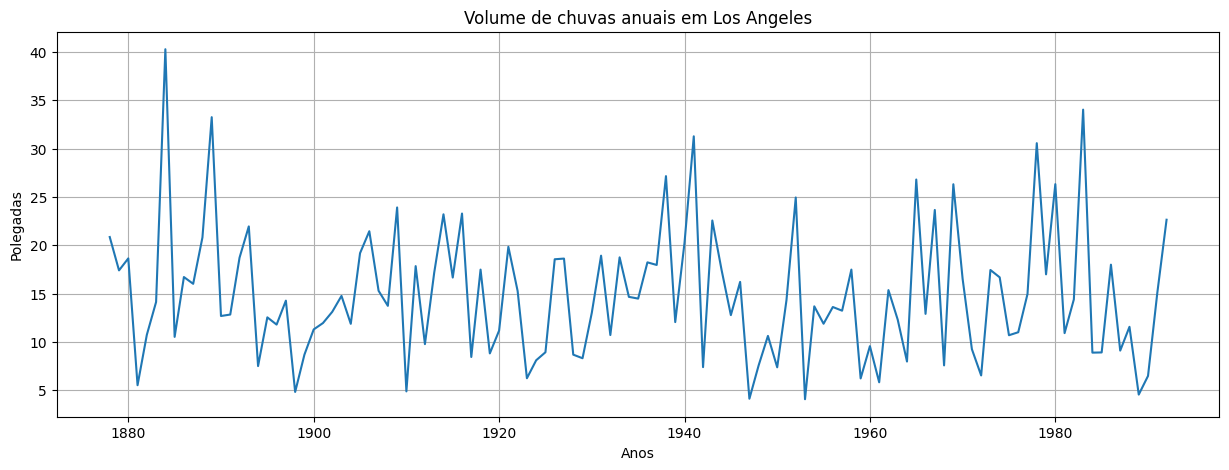

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

LA_rain = pd.read_csv('/content/drive/MyDrive/Datasets/larain.dat')
LA_rain.columns = ['Inches']
begin = 1878
LA_rain['Year'] = range(begin, begin + len(LA_rain))
LA_rain = LA_rain.iloc[:, ::-1]
LA_rain.to_csv('/content/drive/MyDrive/Datasets/larain.csv', index=False, encoding='utf-8')

LA_rain = pd.read_csv('/content/drive/MyDrive/Datasets/larain.csv')
display(LA_rain.head())

plt.figure(figsize=(15, 5))
plt.plot(LA_rain['Year'], LA_rain['Inches'])
plt.title('Volume de chuvas anuais em Los Angeles')
plt.xlabel('Anos')
plt.ylabel('Polegadas')
plt.grid()

O gráfico mostra uma variação considerável em quantidade de chuva ao longo dos anos - em alguns anos os volumes são baixos, outros altos e muitos são em patamares intermediários. O ano de 1883 foi excepcionalmente chuvoso para Los Angeles,
enquanto 1983 foi bastante seco.

Para fins de análise e modelagem, estamos interessados ​​em investigar se anos consecutivos estão ou não relacionados de alguma forma. Se assim for, podemos ser capazes de usar o valor da precipitação de um ano para ajudar a prever a quantidade de precipitação do próximo ano.

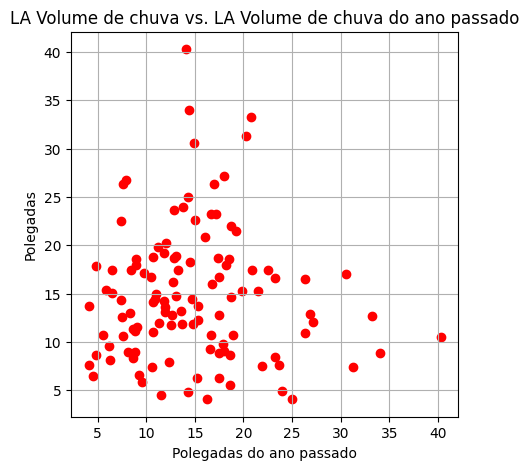

In [55]:
plt.figure(figsize=(5, 5))
plt.scatter(LA_rain['Inches'].shift(1), LA_rain['Inches'], c='red')
plt.title("LA Volume de chuva vs. LA Volume de chuva do ano passado")
plt.xlabel('Polegadas do ano passado')
plt.ylabel('Polegadas')
plt.grid()

Analisando o gráfico:

*   o ponto plotado perto do canto inferior direito mostra que o ano de chuvas extremamente altas, 40 polegadas em 1883, foi seguido por um valor intermediário (cerca de 12 polegadas) em 1884.
*   O ponto próximo ao topo da tela mostra que o ano de 40 polegadas foi precedido por um muito mais ano típico de cerca de 15 polegadas.

A principal conclusão é de que há pouca ou nenhuma informação sobre a quantidade de chuva deste ano em relação à quantidade do ano passado. O gráfico não mostra nenhuma tendência geral.

Há pouca correlação entre o volume de chuvas do "ano passado" e o valor do "ano atual". Do ponto de vista de modelagem ou previsão, essa não é uma série temporal muito interessante!

# Exemplo 02
Como um segundo exemplo, consideremos uma série temporal oriunda de um processo químico industrial. A variável medida aqui é uma propriedade de cor de lotes consecutivos no processo.


,color
0,67
1,63
2,76
3,66
4,69


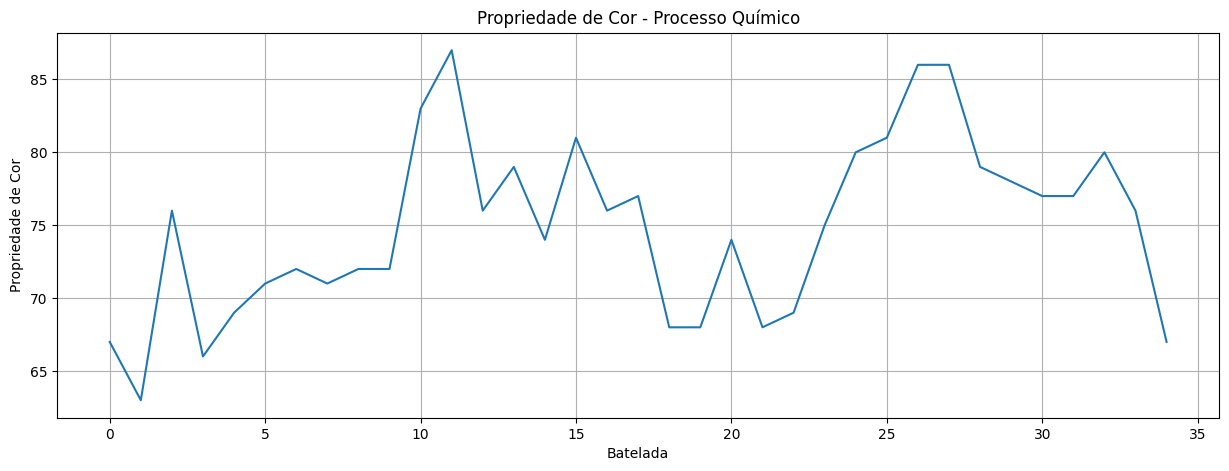

In [56]:
color = pd.read_csv('/content/drive/MyDrive/Datasets/color.dat')
display(color.head())

plt.figure(figsize=(15, 5))
plt.plot(color['color'])
plt.title('Propriedade de Cor - Processo Químico')
plt.xlabel('Batelada')
plt.ylabel('Propriedade de Cor')
plt.grid()

Aqui valores que são vizinhos no tempo tendem a ser semelhantes em intensidade de cor. Parece que os vizinhos estão relacionados entre si!

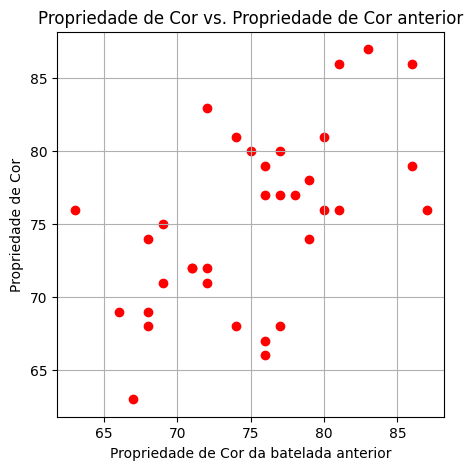

In [57]:

plt.figure(figsize=(5, 5))
plt.scatter(color['color'].shift(1), color['color'], c='red')
plt.title("Propriedade de Cor vs. Propriedade de Cor anterior")
plt.xlabel('Propriedade de Cor da batelada anterior')
plt.ylabel('Propriedade de Cor')
plt.grid()

Análise do gráfico:

*   nota-se uma uma ligeira tendência ascendente neste gráfico - valores baixos tendem a ser seguidos no próximo lote por
valores baixos, valores médios tendem a ser seguidos por valores médios e altos
valores tendem a ser seguidos por valores altos.
*   a tendência é aparente, mas não é muito forte.

# Usando os diagramas ACF e PACF

## Diagramas ACF

Como vimos anteriormente, a autocorrelação é a correlação entre uma série temporal com uma versão defasada de si mesma. O diagrama ACF é a representação gráfica dessa função (é uma versão um pouco mais elaboarada dos diagramas de autocorrelação da Aula 01).

O diagrama ACF começa com um atraso (*lag*) de 0, que indica a correlação da série temporal consigo mesma e, portanto, resulta em uma correlação de 1. A seguir, são calculadas as autocorrelações para os demais atrasos, considerando todos os valores entre eles. Ou seja, para o atraso de número 4, o ACF computa o valor de autocorrelação levando em consideração os efeitos de todos os atrasos entre 0 e 4.

Além disso, o diagrama ACF incorpora uma área azul em sua representação. Ela indica o intervalo de confiança de 95% e é um indicador do limite de significância. Trocando em miúdos, qualquer valor dentro da área azul é estatisticamente próximo de zero. Consequentemente, qualquer valor fora da área azul é estatisticamente diferente de zero.

O gráfico ACF pode fornecer respostas para as seguintes perguntas:

*   A série temporal observada é um ruído branco/aleatório
*   Uma observação está relacionada a uma observação adjacente, ou a uma observação com dois atrasos e assim por diante?
*   A série temporal observada pode ser modelada com um modelo $MA$? Se sim, qual é a ordem?

## Diagramas PACF

O diagrma PACF é a representação gráfica da *função de autocorrelação parcial*. Esta função indica a correlação entre duas variáveis ​​aleatórias enquanto se controla o efeito de outra(s) variável(is) aleatória(s) que afeta as variáveis ​​originais que estão sendo correlacionadas.

Digamos que temos três variáveis ​​aleatórias de $X$, $Y$ e $Z$. A correlação parcial entre $X$ e $Y$, excluindo os efeitos de $Z$, é matematicamente:

$$r_{(X,Y),Z}=\frac{r_{XY}-r_{XZ}r_{YZ}}{\sqrt{(1-r_{XZ})^2-(1-r_{YZ})^2}}$$

Na expressão anterior, $r$ é o coeficiente de correlação que varia entre -1 e 1.

A autocorrelação parcial é simplesmente a correlação parcial de uma série temporal em dois estados diferentes no tempo. Em outras palavras, é a correlação entre as séries temporais em duas defasagens diferentes, *não considerando o efeito de quaisquer defasagens intermediárias*. Por exemplo, a autocorrelação parcial para um atraso de 2 é apenas a correlação que o atraso 1 não explicou.

O diagrama PACF é usado para estimar o número/ordem de componentes autorregressivos ao ajustar modelos $AR$, $ARMA$ ou $ARIMA$ (tais modelos são provavelmente os mais usados ​​e geralmente fornecem os melhores resultados ao treinar um modelo de previsão).

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


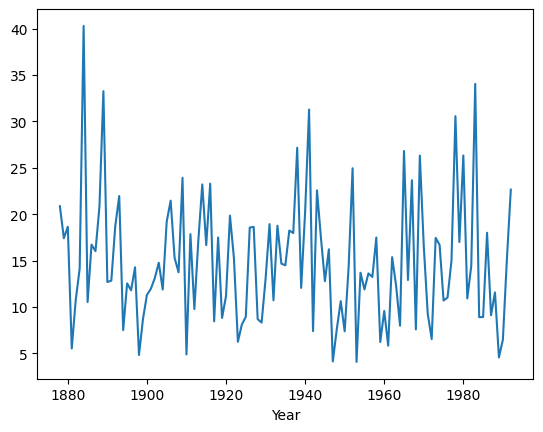

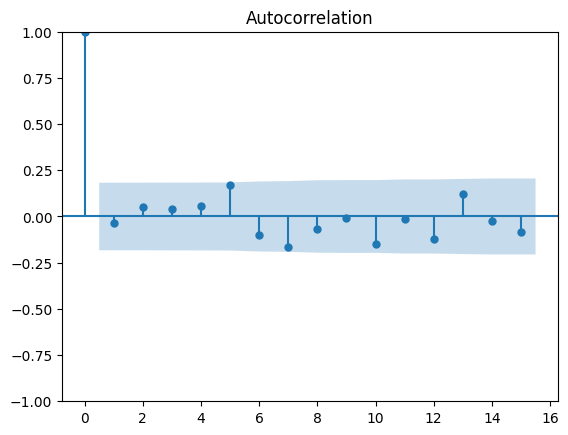

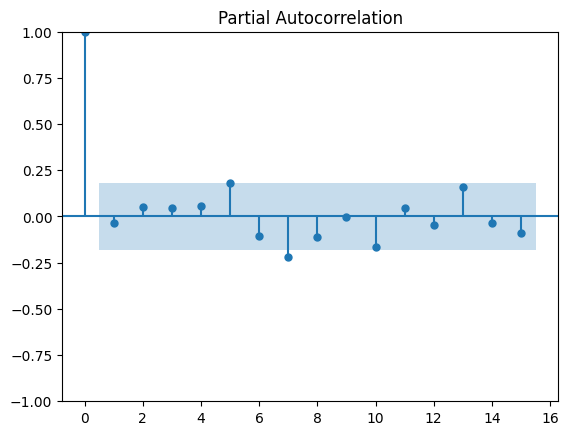

In [78]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Série Temporal das chuvas em Los Angeles
serie_chuva = pd.Series(data=LA_rain['Inches'].values, index=LA_rain['Year'])
serie_chuva.plot()
plot_acf(serie_chuva, lags=15)
plot_pacf(serie_chuva, lags=15)
plt.show()

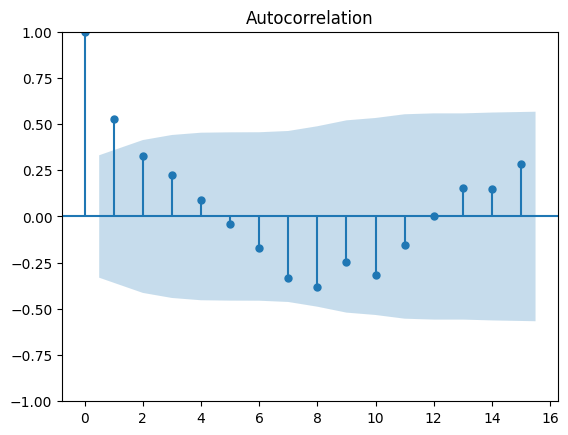

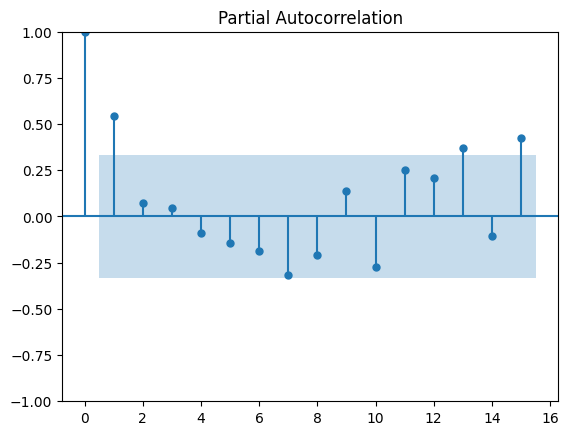

In [81]:
# Série Temporal da propriedade de cor
serie_cor = pd.Series(data=color['color'])
plot_acf(serie_cor, lags=15)
plt.show()
plot_pacf(serie_cor, lags=15)
plt.show()

# Exemplo 03
Vamos analisar o número médio mensal de manchas solares relativas de 1749 a 1983. Os dados foram coletados pelo Observatório Federal Suíço, localizado em Zurique, até 1960. Depois, o registro dos dados passou para a responsabilidade do Observatório Astronômico de Tóquio. Os dados estão registrados no aqruivo sunspots.csv.

In [66]:
manchas = pd.read_csv('/content/drive/MyDrive/Datasets/sunspots.csv')
manchas.head()

,x
1,58.0
2,62.6
3,70.0
4,55.7
5,85.0


In [67]:
# Renomeando a coluna do núemro médio de manchas e começando o índice em zero
manchas.columns = ['Manchas solares']
manchas = manchas.reset_index(drop=True)
manchas.head()

,Manchas solares
0,58.0
1,62.6
2,70.0
3,55.7
4,85.0


In [68]:
# Gerando a estampa temporal
indice = pd.date_range('1749', periods = len(manchas), freq='M')
print(indice)

DatetimeIndex(['1749-01-31', '1749-02-28', '1749-03-31', '1749-04-30',
               '1749-05-31', '1749-06-30', '1749-07-31', '1749-08-31',
               '1749-09-30', '1749-10-31',
               ...
               '1983-03-31', '1983-04-30', '1983-05-31', '1983-06-30',
               '1983-07-31', '1983-08-31', '1983-09-30', '1983-10-31',
               '1983-11-30', '1983-12-31'],
              dtype='datetime64[ns]', length=2820, freq='M')


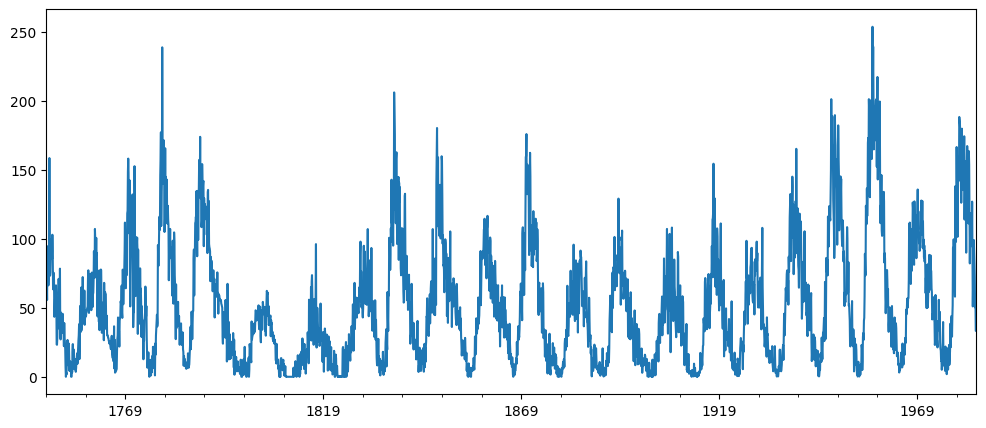

In [69]:
manchas = pd.Series(manchas['Manchas solares'].values, index=indice)
plt.figure(figsize=(12, 5))
manchas.plot()
plt.show()

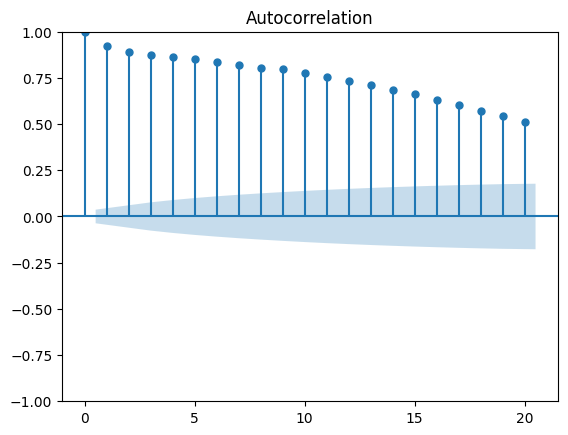

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


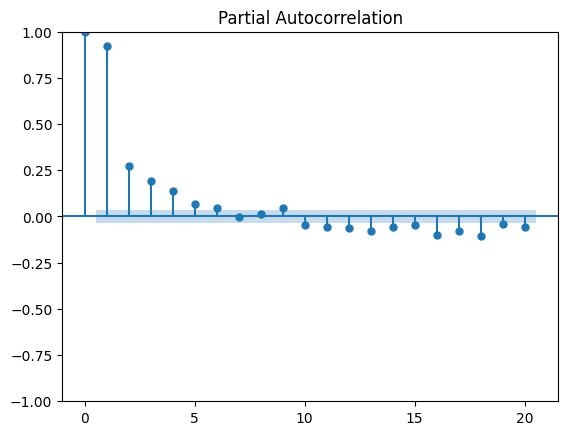

In [70]:
plot_acf(manchas, lags=20)
plt.show()
plot_pacf(manchas, lags=20)
plt.show()